# Assignment for Programming for Data Analysis

**Synthesize a data set of a real-world phenomenom and evaluate**


## **Introduction** 


The Premier League is the highest level of the English football system. It consists of 20 teams who play each other home and away. In total there are 380 matches in season. 

As my dataset for this I have chosen to look at the home and away records of each Premier League football match from the 2000-2001 season until 2017-2018 season. I will be examining the relationship between playing at home (versus away) and how it relates to goals scored and cards given. There are many previous studies ([Pollard, 1986](https://www.tandfonline.com/doi/abs/10.1080/02640418608732122), & [Thomas, Reeves and Davies, 2004](https://journals.sagepub.com/doi/epdf/10.2466/pms.99.3f.1212-1216)) looking at the phenomenon of home advantage in football.

Pollard examined the "number of points won at home. . . expressed as a percentage of all points gained" in the English First Division from 1888-1984. He found that approximately 64% of points were won at home.

The Premier League was established in 1992 and Thomas et al's study "was done to replicate Pollard's work with a contemporary focus in the English Football Premiership". In this study it was found that 60.34% of points were won at home games. 

In these studies a number of reasons are given for this disparity, including;

- Familiarity with conditions (size of pitch etc).
- Crowd support.
- Travel fatigue for the away team.

I obtained this dataset on [Kwaggle](https://www.kaggle.com/datasets/saife245/english-premier-league). I have downloaded it as csv file to my project folder. 

This dataset contains statistics from every Premier League game since the beginning of the 00-01 season. As the above studies have shown the majority of points in a season are won by the home team. This should also be reflected in the number of goals scored. Yellow and red cards are awarded for indiscipline, logic would dictate that the team under more pressure is more likely to accrue yellow and red cards. My analysis below will look to see if this holds true. 

For the purposes of this project I will only be looking at Home goals scored, Away goals scored, Home yellow cards, Away yellow cards, Home red cards and Away red cards

Once I understand the relationship between these factors, I will attmempt to synthesize this data myself.

## **Data Importing**


In [1]:
# First of all I am going to import the libraries that I will be using for this task. 

import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# I have saved the dataset in the same folder as my notebook. I am going to import it to the notebook 

footballdf = pd.read_csv('final_dataset.csv')

In [3]:
#Going to review the dataset to see it is what is expected
footballdf.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/2000,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/2000,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/2000,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/2000,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/2000,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


This dataset contains 45 different variables. For the purpose of this project I will only be looking at  'Home goals scored', 'Away goals scored', 'Home yellow cards', 'Away yellow cards', 'Home red cards' and 'Away red cards'. In the dataset these variables have the below names.

- FTHG = Full Time Home Team Goals
- FTAG = Full Time Away Team Goals
- HY = Home yellow cards
- AY = Away yellow cards
- HR = Home red cards
- AR = Away red cards

I will create a new dataset with just these variables.

In [4]:
# new dataset with only columns on interest

prem_df = footballdf[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HY', 'AY', 'HR', 'AR']]
prem_df.info()
prem_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6840 non-null   object
 1   HomeTeam  6840 non-null   object
 2   AwayTeam  6840 non-null   object
 3   FTHG      6840 non-null   int64 
 4   FTAG      6840 non-null   int64 
 5   HY        6840 non-null   int64 
 6   AY        6840 non-null   int64 
 7   HR        6840 non-null   int64 
 8   AR        6840 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 481.1+ KB


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HY,AY,HR,AR
0,19/08/2000,Charlton,Man City,4,0,1,2,0,0
1,19/08/2000,Chelsea,West Ham,4,2,1,2,0,0
2,19/08/2000,Coventry,Middlesbrough,1,3,5,3,1,0
3,19/08/2000,Derby,Southampton,2,2,1,1,0,0
4,19/08/2000,Leeds,Everton,2,0,1,3,0,0


This dataframe shows the information we want. There are 6840 rows each representing one match that occurred. We can see columns showing what teams played, the goals scored for the home team (FTHG), the goals scored for the away team (FTAG), the yellow cards received for the home team (HY), the yellow cards received for the away team (AY), the red cards received for the home team (HR) and the red cards received for the away team (AR).

For the purposes of context I have kept the first 3 columns with the fixture date and teams that played. However I will not be using these in my analysis.

## **Graphical Analysis**

<BarContainer object of 1 artists>

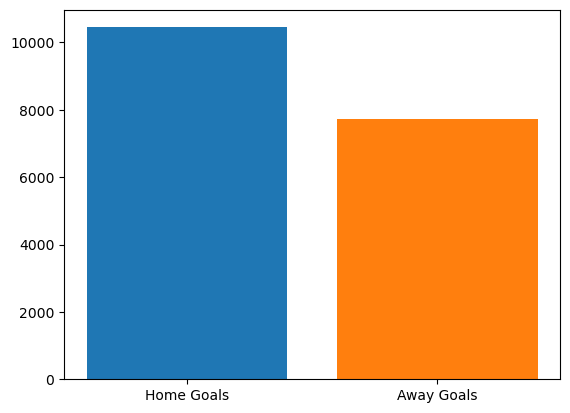

In [5]:
# Display the total number of goals scored by the home and away team

fig, ax = plt.subplots()

total_home_goals = prem_df['FTHG'].sum()
total_away_goals = prem_df['FTAG'].sum()

ax.bar('Home Goals', total_home_goals, label = 'Home Goals')
ax.bar('Away Goals', total_away_goals, label = 'Away Goals')

<BarContainer object of 1 artists>

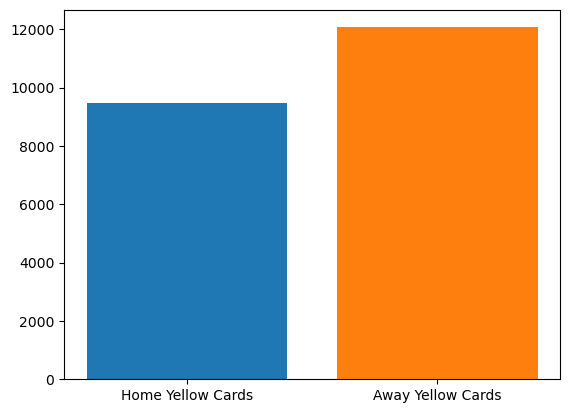

In [6]:
# Plot the total number of yellow cards received by the home and away team

fig, ax = plt.subplots()

total_home_yellow = prem_df['HY'].sum()
total_away_yellow = prem_df['AY'].sum()


ax.bar('Home Yellow Cards', total_home_yellow, label = 'Home Yellow Cards')
ax.bar('Away Yellow Cards', total_away_yellow, label = 'Away Yellow Cards')


<BarContainer object of 1 artists>

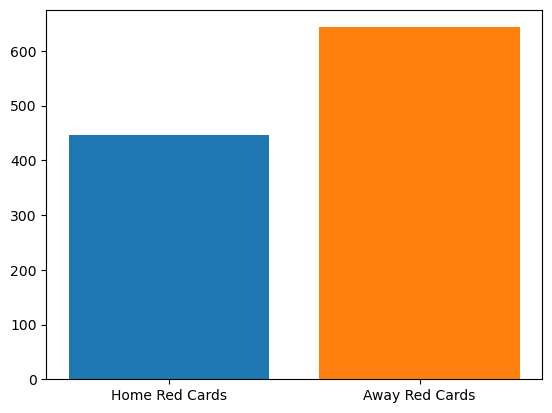

In [7]:
# Plot the total number of red cards received by the home and away team

fig, ax = plt.subplots()

total_home_red = prem_df['HR'].sum()
total_away_red = prem_df['AR'].sum()

ax.bar('Home Red Cards', total_home_red, label = 'Home Red Cards')
ax.bar('Away Red Cards', total_away_red, label = 'Away Red Cards')

From looking at the above we can see the advantageous relationship of teams playing at home. 


In [138]:
#Calculate the percentage of all goals scored that were scored by the home team

# all goals 
all_goals = total_home_goals + total_away_goals

# using {:.2f}.format to restrict these values to two decimal places
percent_HG = "{:.2f}".format((total_home_goals/all_goals)*100)
percent_AG = "{:.2f}".format((total_away_goals/all_goals)*100)

# using {:.2f}.format to restrict these values to two decimal places
print(f'{percent_HG}% of all goals are scored by the home team. Only {percent_AG}% are scored by the away team.')



57.47% of all goals are scored by the home team. Only 42.53% are scored by the away team.


In [140]:
#Calculate the percentage of all yellow cards that were awarded to the home team

# all yellow cards 
all_yellows = total_home_yellow + total_away_yellow

percent_HY = "{:.2f}".format((total_home_yellow/all_yellows)*100)
percent_AY = "{:.2f}".format((total_away_yellow/all_yellows)*100)

print(f'Only {percent_HY}% of yellow cards are awarded to the home team. Meanwhile {percent_AY}% are given to the away team.')


Only 44.01% of yellow cards are awarded to the home team. Meanwhile 55.99% are given to the away team.


In [141]:
#Calculate the percentage of all red cards that were awarded to the home team

# all yellow cards 
all_reds = total_home_red + total_away_red
percent_HR = "{:.2f}".format((total_home_red/all_reds)*100)
percent_AR = "{:.2f}".format((total_away_red/all_reds)*100)

print(f'Only {percent_HR}% of red cards are awarded to the home team. Meanwhile {percent_AR}% are given to the away team.')


Only 41.01% of red cards are awarded to the home team. Meanwhile 58.99% are given to the away team.


In [11]:
home_goals = prem_df['FTHG'] # dataframe with just home goals
away_goals = prem_df['FTAG']# dataframe with just away goals

home_y = prem_df['HY'] # dataframe with just home yellow cards
away_y = prem_df['AY'] # dataframe with just away yellow cards

home_r = prem_df['HR'] # dataframe with just home red cards
away_r = prem_df['AR'] # dataframe with just away red cards



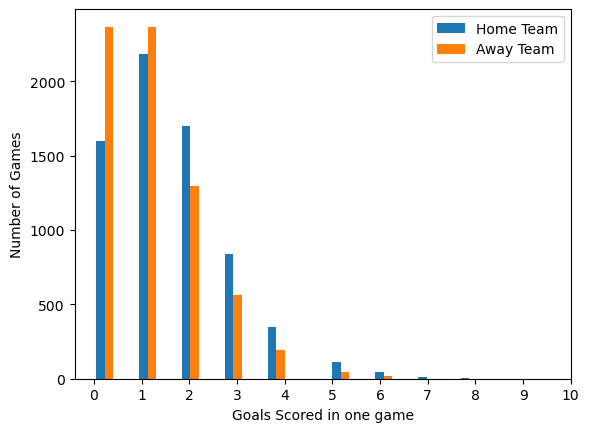

In [56]:
#Create a histogram showing the distribution of goals scored both home and away

plt.hist([home_goals, away_goals], 20, label = ['Home Team', 'Away Team'])
plt.xticks(range(0, 11))
plt.ylabel("Number of Games")
plt.xlabel("Goals Scored in one game")
plt.legend()

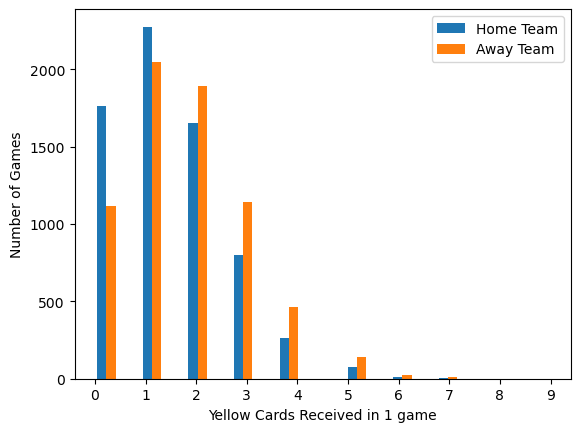

In [57]:
#Create a histogram showing the distribution of yellow cards received both home and away

plt.hist([home_y, away_y], 20, label = ['Home Team', 'Away Team'])
plt.xticks(range(10))
plt.ylabel("Number of Games")
plt.xlabel("Yellow Cards Received in 1 game")
plt.legend()

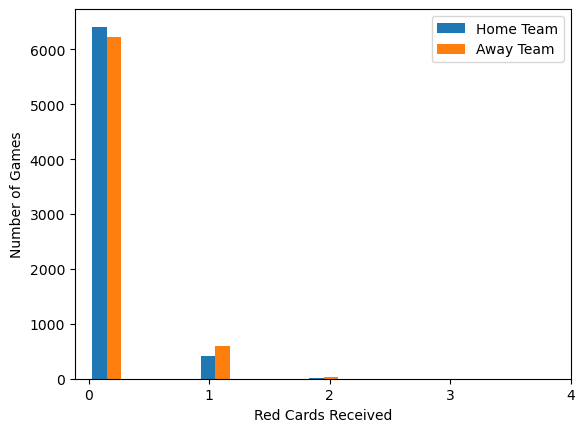

In [14]:
#Create a histogram showing the distribution of yellow cards received both home and away

plt.hist([home_r, away_r], label = ['Home Team', 'Away Team'])
plt.xticks(range(5))
plt.ylabel("Number of Games")
plt.xlabel("Red Cards Received")
plt.legend()

When looking at the above historgrams, it looks like all of our(*) variables follow a Poisson distribution. 

* Receiving more than 1 red card per game is relatively uncommon. So it is difficult to tell from this histogram if this variable does indeed fit a Poisson distribution.

"[A Poisson distribution](https://www.scribbr.com/statistics/poisson-distribution/#:~:text=A%20Poisson%20distribution%20is%20a,the%20mean%20number%20of%20events.) is a discrete probability distribution, meaning that it gives the probability of a discrete (i.e., countable) outcome. For Poisson distributions, the discrete outcome is the number of times an event occurs, represented by k."

In our dataset the events taking place are the goals scored and yellow or red cards awarded.  In order to create a Poisson distribution we need to know the mean, or Lambda ( $\lambda$)

The equation for the Poisson distribution is below:

$$ f(\kappa;\lambda) = \frac{\lambda^k.e^{-\lambda}}{\kappa!}$$

## **Data Analysis**

In [15]:
home_goals.describe()

count    6840.000000
mean        1.527485
std         1.297913
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: FTHG, dtype: float64

For our Variable Home_goals, we know;

- the standard deviation : 1.297913
- mean: 1.527485

We now take a look at the mean and variance (the square of the standard deviation) of goals scored. We are hoping to see these two values to be equal, since we know that the mean and variance of a Poisson random variable are the same.

In [16]:
#Mean and Variance of home goals scored

print(f'The Mean number of home goals scored is {home_goals.mean()}')
print(f'While  the Variance is {home_goals.var()}')


The Mean number of home goals scored is 1.527485380116959
While  the Variance is 1.6845785565927742


While the mean and variance values aren't exactly the same they are still relatively close. Given the graphical analysis done above I think it is fair to say this variable fits within a Poisson Distribution

In [17]:
away_goals.describe()

count    6840.000000
mean        1.130263
std         1.124566
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: FTAG, dtype: float64

In [18]:
#Mean and Variance of away goals scored

print(f'The Mean number of away goals scored is {away_goals.mean()}')
print(f'While the Variance is {away_goals.var()}')

The Mean number of away goals scored is 1.1302631578947369
While the Variance is 1.2646491484597284


Again the mean and variance are close enough to fit a Poisson Distribution.

In [19]:
home_y.describe()

count    6840.000000
mean        1.386842
std         1.181844
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: HY, dtype: float64

In [20]:
#Mean and Variance of home yellow cards received

print(f'The Mean number of yellow cards received by the home team is {home_y.mean()}')
print(f'While the Variance is {home_y.var()}')

The Mean number of yellow cards received by the home team is 1.3868421052631579
While the Variance is 1.3967562201306858


In [21]:
away_y.describe()

count    6840.000000
mean        1.764327
std         1.278690
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: AY, dtype: float64

In [22]:
#Mean and Variance of away yellow cards received

print(f'The Mean number of yellow cards received by the away team is {away_y.mean()}')
print(f'While the Variance is {away_y.var()}')

The Mean number of yellow cards received by the away team is 1.764327485380117
While the Variance is 1.6350483852072715


In [23]:
#Mean and Variance of red cards received for both home and away

print(f'The Mean number of red cards received by the home team is {home_r.mean()}')
print(f'While the Variance is {home_r.var()}\n')


print(f'The Mean number of red cards received by the away team is {away_r.mean()}')
print(f'While the Variance is {away_r.var()}')

The Mean number of red cards received by the home team is 0.06535087719298245
While the Variance is 0.0672303199144276

The Mean number of red cards received by the away team is 0.09400584795321637
While the Variance is 0.0924922122775303


The mean and the variance for all of these values are almost equal. This supports the idea that they fit a Poisson distribution.

# **Data Synthesis**

Now that we are confident that we know the distributions for our variables, we can attempt to synthesize a new dataset while maintaining the characteristics of the original data.

We will use the numpy.random.poisson generators to form a dataframe for each variable and then stitch them together to form a new dataset. In order to create a Poisson distribution we need to know the mean, or Lambda ( $\lambda$). We want to maintain the size of the original dataset which had 6840 values. 

In [24]:
mean_home_goals = home_goals.mean()
mean_away_goals = away_goals.mean()

mean_home_y = home_y.mean()
mean_away_y = away_y.mean()

mean_home_r = home_r.mean()
mean_away_r = away_r.mean()

### Generation of new dataset

In [25]:
df1 = np.random.poisson(mean_home_goals, 6840)

#New Home Goals (NHG) generated variable
NHG = pd.DataFrame(df1)
NHG.describe()



,0
count,6840.000000
mean,1.534357
std,1.216204
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


In [26]:
df2 = np.random.poisson(mean_away_goals, 6840)

# New Away Goals (NAG) generated variable
NAG = pd.DataFrame(df2)
NAG.describe()

,0
count,6840.000000
mean,1.129825
std,1.073053
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,8.000000


In [94]:
df3 = np.random.poisson(mean_home_y, 6840)

# New Home Yellow Cards (NHY) generated variable
NHY = pd.DataFrame(df3)
NHY.describe()

,0
count,6840.000000
mean,1.386550
std,1.164617
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [95]:
df4 = np.random.poisson(mean_away_y, 6840)

# New Away Yellow Cards (NAY) generated variable
NAY = pd.DataFrame(df4)
NAY.describe()

,0
count,6840.000000
mean,1.775877
std,1.330545
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


In [96]:
df5 = np.random.poisson(mean_home_r, 6840)

# New Home Red Cards (NHR) generated variable
NHR = pd.DataFrame(df5)
NHR.describe()

,0
count,6840.000000
mean,0.070468
std,0.262718
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [97]:
df6 = np.random.poisson(mean_away_r, 6840)

# New Away Red Cards (NAR) generated variable
NAR = pd.DataFrame(df6)
NAR.describe()

,0
count,6840.000000
mean,0.089620
std,0.300622
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [99]:
# Stitching the newly generated dataframes into one dataset


new_football_df = pd.concat([NHG, NAG, NHY, NAY, NHR, NAR], axis=1)

#Adding nanmes to each column as for some reason the new dataset isnt taking the previous dataframe names. 
new_column_names = ['NHG', 'NAG', 'NHY', 'NAY', 'NHR', 'NAR']
new_football_df.columns = new_column_names

new_football_df.describe()

,NHG,NAG,NHY,NAY,NHR,NAR
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,1.534357,1.129825,1.386550,1.775877,0.070468,0.089620
std,1.216204,1.073053,1.164617,1.330545,0.262718,0.300622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000
max,8.000000,8.000000,7.000000,8.000000,2.000000,3.000000


### Analysis of new dataset

**Goals Scored**

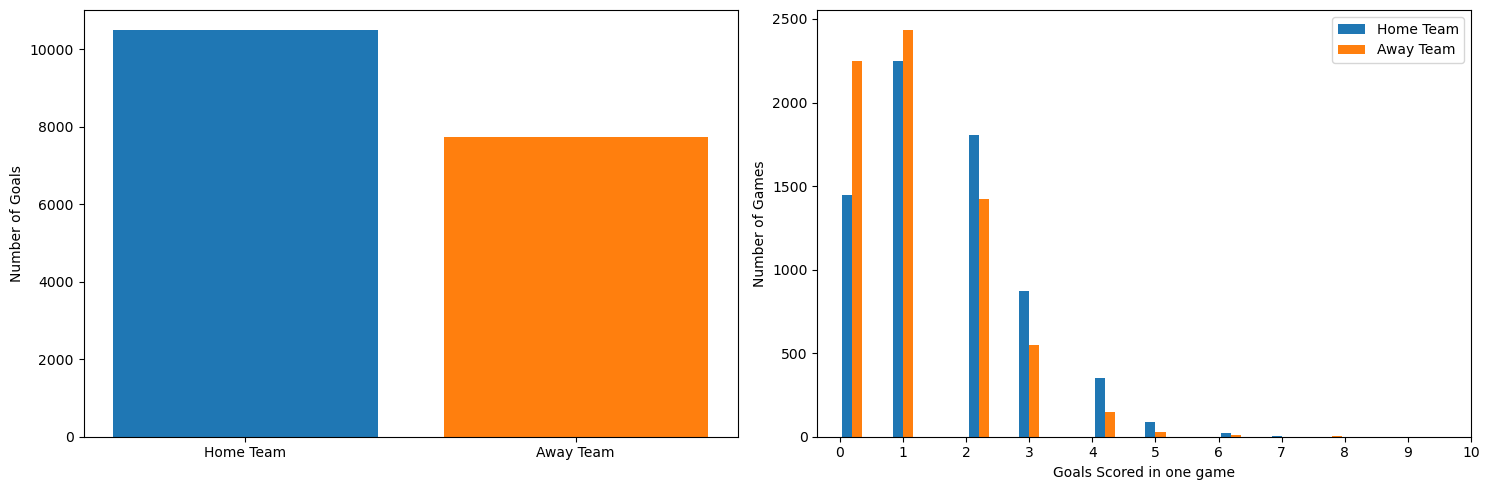

In [152]:
# Create a bar chart showing the number of goals in our new dataframe and a histogram showing the distribution

fig, axis = plt.subplots(1, 2, figsize=(15, 5))

# df.sum() will allow us to get the total number of goals in the dataframe

new_total_HG = NHG[0].sum()
new_total_AG = NAG[0].sum()

# New Dataset Barchart for goals scored
axis[0].bar('Home Team', new_total_HG, label = 'Home Goals')
axis[0].bar('Away Team', new_total_AG, label = 'Away Goals')
axis[0].set_ylabel("Number of Goals")

#The dataframes are two dimensional. I just want the number of goals which is column "0"
hist_NHG= NHG[0]
hist_NAG= NAG[0]

# New Dataset Histogram for goals scored
axis[1].hist([hist_NHG, hist_NAG], 20, label = ['Home Team', 'Away Team'])
axis[1].set_xticks(range(0, 11))
axis[1].set_ylabel("Number of Games")
axis[1].set_xlabel("Goals Scored in one game")
axis[1].legend()

plt.tight_layout()

In [153]:
#Calculate the percentage of all goals scored that were scored by the home team

#all goals 
new_all_goals = new_total_HG + new_total_AG

# using {:.2f}.format to restrict these values to two decimal places
percent_NHG = "{:.2f}".format((new_total_HG/new_all_goals)*100) # Percent of home team goals
percent_NAG = "{:.2f}".format((new_total_AG/new_all_goals)*100) # Percent of away team goals

# using {:.2f}.format to restrict these values to two decimal places
print(f'{percent_NHG}% of all goals are scored by the home team. Only {percent_NAG}% are scored by the away team.')

57.59% of all goals are scored by the home team. Only 42.41% are scored by the away team.


As the dataset was created with a Poisson random generator the distribution shown in the histogram above is of no surprise. Like we did for the orignal dataset we will also check that the mean = the variance. 

In [163]:
#Mean and Variance of goals scored for both home and away

print(f'The Mean number of goals scored by the home team is {hist_NHG.mean()}')
print(f'While the Variance is {hist_NHG.var()}\n')


print(f'The Mean number of goals scored by the away team is {hist_NAG.mean()}')
print(f'While the Variance is {hist_NAG.var()}')

The Mean number of goals scored by the home team is 1.534356725146199
While the Variance is 1.4791528249145725

The Mean number of goals scored by the away team is 1.1298245614035087
While the Variance is 1.151442577785314


**Yellow Cards**

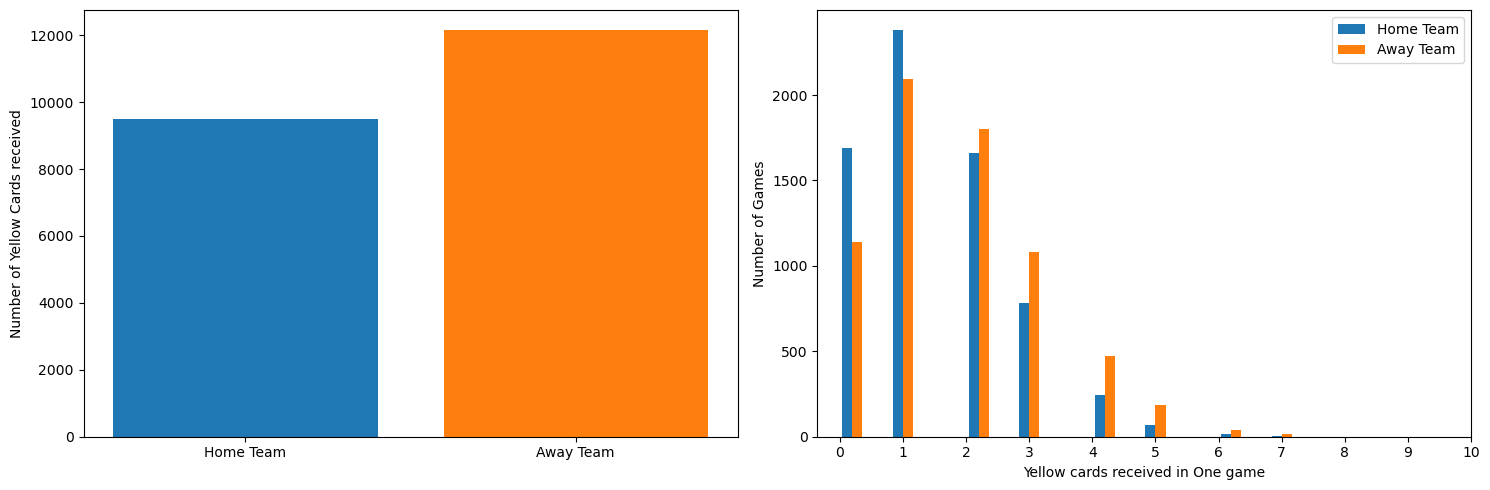

In [154]:
# Create a bar chart showing the total number of yellow cards in our new dataframe and a histogram showing the distribution of these. 

fig, axis = plt.subplots(1, 2, figsize=(15, 5))

# df.sum() will allow us to get the total number of goals in the dataframe

new_total_HY = NHY[0].sum()
new_total_AY = NAY[0].sum()

# New Dataset Barchart for goals scored
axis[0].bar('Home Team', new_total_HY, label = 'Home Yellows')
axis[0].bar('Away Team', new_total_AY, label = 'Away Yellows')
axis[0].set_ylabel("Number of Yellow Cards received") 

#The dataframes are two dimensional. I just want the number of goals which is column "0"
hist_NHY = NHY[0]
hist_NAY = NAY[0]

# New Dataset Histogram for goals scored
axis[1].hist([hist_NHY, hist_NAY], 20, label = ['Home Team', 'Away Team'])
axis[1].set_xticks(range(0, 11))
axis[1].set_ylabel("Number of Games")
axis[1].set_xlabel("Yellow cards received in One game")
axis[1].legend()

plt.tight_layout()

In [155]:
#Calculate the percentage of all yellow cards awarded to the home team


#all yellows 
new_all_yellows = new_total_HY + new_total_AY

percent_NHY = "{:.2f}".format((new_total_HY/new_all_yellows)*100)
percent_NAY = "{:.2f}".format((new_total_AY/new_all_yellows)*100)

print(f'Only {percent_NHY}% of all yellow cards are awarded to the home team. While {percent_NAY}% are given to the away team.')

Only 43.84% of all yellow cards are awarded to the home team. While 56.16% are given to the away team.


In [164]:
#Mean and Variance of yellow cards received for both home and away

print(f'The Mean number of yellow cards received by the home team is {hist_NHY.mean()}')
print(f'While the Variance is {hist_NHY.var()}\n')


print(f'The Mean number of yellow cards received by the away team is {hist_NAY.mean()}')
print(f'While the Variance is {hist_NAY.var()}')

The Mean number of yellow cards received by the home team is 1.3865497076023392
While the Variance is 1.3563331734317463

The Mean number of yellow cards received by the away team is 1.7758771929824562
While the Variance is 1.7703494278172422


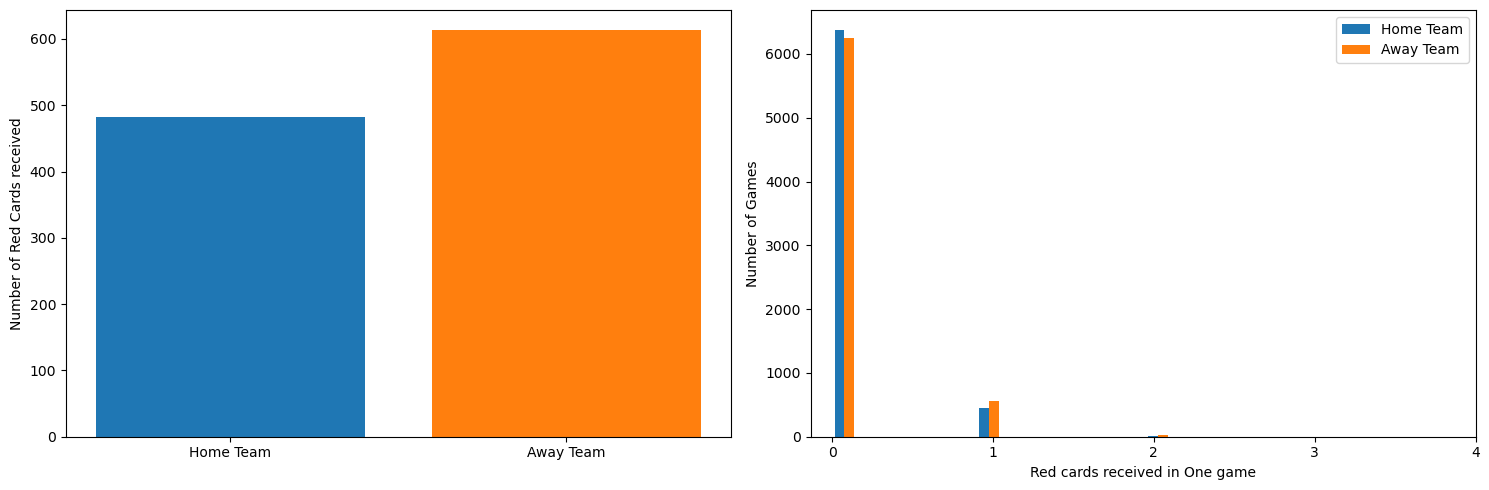

In [156]:
# Create a bar chart showing the total number of red cards in our new dataframe and a histogram showing the distribution of these. 

fig, axis = plt.subplots(1, 2, figsize=(15, 5))

# df.sum() will allow us to get the total number of goals in the dataframe

new_total_HR = NHR[0].sum()
new_total_AR = NAR[0].sum()

# New Dataset Barchart for goals scored
axis[0].bar('Home Team', new_total_HR, label = 'Home Reds')
axis[0].bar('Away Team', new_total_AR, label = 'Away Reds')
axis[0].set_ylabel("Number of Red Cards received")

#The dataframes are two dimensional. I just want the number of goals which is column "0"
hist_NHR = NHR[0]
hist_NAR = NAR[0]

# New Dataset Histogram for goals scored
axis[1].hist([hist_NHR, hist_NAR], 20, label = ['Home Team', 'Away Team'])
axis[1].set_xticks(range(0, 5))
axis[1].set_ylabel("Number of Games")
axis[1].set_xlabel("Red cards received in One game")
axis[1].legend()

plt.tight_layout()

In [158]:
#Calculate the percentage of all red cards awarded to the home team

#all red cards 
new_all_reds = new_total_HR + new_total_AR

percent_NHR = "{:.2f}".format((new_total_HR/new_all_reds)*100)
percent_NAR = "{:.2f}".format((new_total_AR/new_all_reds)*100)

print(f'Only {percent_NHR}% of all red cards are awarded to the home team. While {percent_NAR}% are given to the away team.')

Only 44.02% of all red cards are awarded to the home team. While 55.98% are given to the away team.


In [165]:
#Mean and Variance of red cards received for both home and away

print(f'The Mean number of red cards received by the home team is {hist_NHR.mean()}')
print(f'While the Variance is {hist_NHR.var()}\n')


print(f'The Mean number of red cards received by the away team is {hist_NAR.mean()}')
print(f'While the Variance is {hist_NAR.var()}')

The Mean number of red cards received by the home team is 0.07046783625730994
While the Variance is 0.06902098302734859

The Mean number of red cards received by the away team is 0.08961988304093567
While the Variance is 0.09037330190025661


# Comparison between Datasets

<function matplotlib.pyplot.show(close=None, block=None)>

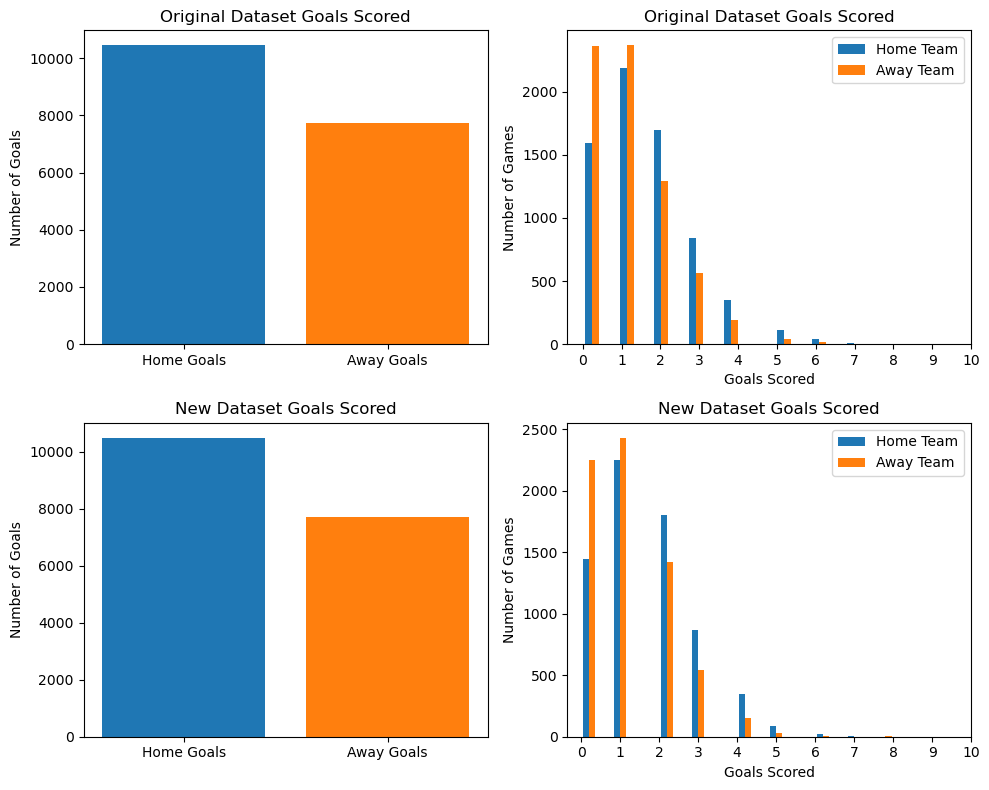

In [109]:
# Create a bar chart showing the number of goals scored home and away for both datasets

fig, axis = plt.subplots(2, 2, figsize=(10, 8))
 

# Original Dataset Barchart for goals scored
axis[0, 0].bar('Home Team', total_home_goals, label = 'Home Goals')
axis[0, 0].bar('Away Team', total_away_goals, label = 'Away Goals')
axis[0, 0].set_ylabel("Number of Goals")
axis[0, 0].set_title("Original Dataset Goals Scored") 


# Original Dataset Histogram for goals scored
axis[0, 1].hist([home_goals, away_goals], 20, label = ['Home Team', 'Away Team'])
axis[0, 1].set_xticks(range(0, 11))
axis[0, 1].set_ylabel("Number of Games")
axis[0, 1].set_xlabel("Goals Scored")
axis[0, 1].set_title("Original Dataset Goals Scored")
axis[0, 1].legend()


# New Dataset Barchart for goals scored
axis[1, 0].bar('Home Team', new_total_HG, label = 'Home Goals')
axis[1, 0].bar('Away Team', new_total_AG, label = 'Away Goals')
axis[1, 0].set_ylabel("Number of Goals")
axis[1, 0].set_title("New Dataset Goals Scored") 


# New Dataset Histogram for goals scored
axis[1, 1].hist([hist_NHG, hist_NAG], 20, label = ['Home Team', 'Away Team'])
axis[1, 1].set_xticks(range(0, 11))
axis[1, 1].set_ylabel("Number of Games")
axis[1, 1].set_xlabel("Goals Scored")
axis[1, 1].set_title("New Dataset Goals Scored")
axis[1, 1].legend()


plt.tight_layout()
plt.show

When comparing between both datasets I want to be able to refer to a variable value in Markdown. This does not seem to be enabled in Jupyter notebook from the research I have done. 

As a workaround I have imported markdown from the Ipython package.

This allows you to turn a coded cell into Markdown and allows you to insert the value of variables.

In [45]:
from IPython.display import Markdown as md

In [53]:
md(f"""I plotted the barcharts and histograms for goals scored above with both the original and newly synthesised datasets side by side for ease of comparison.
   
While the values in new_df are different we can see they follow the same trends and distributions.

In the original dataset (football_df) the home team scored {percent_HG}% of all goals while the away team scored {percent_AG}% 

While in my newly synthesised (new_df) the home team scored {percent_NHG}% of all goals and the away team score {percent_NAG}%

Even with the newly generated data this relationship remains the same. 

""")

I plotted the barcharts and histograms for goals scored above with both the original and newly synthesised datasets side by side for ease of comparison.
   
While the values in new_df are different we can see they follow the same trends and distributions.

In the original dataset (football_df) the home team scored 57% of all goals while the away team scored 42% 

While in my newly synthesised (new_df) the home team scored 57% of all goals and the away team score 42%

Even with the newly generated data this relationship remains the same. 



<function matplotlib.pyplot.show(close=None, block=None)>

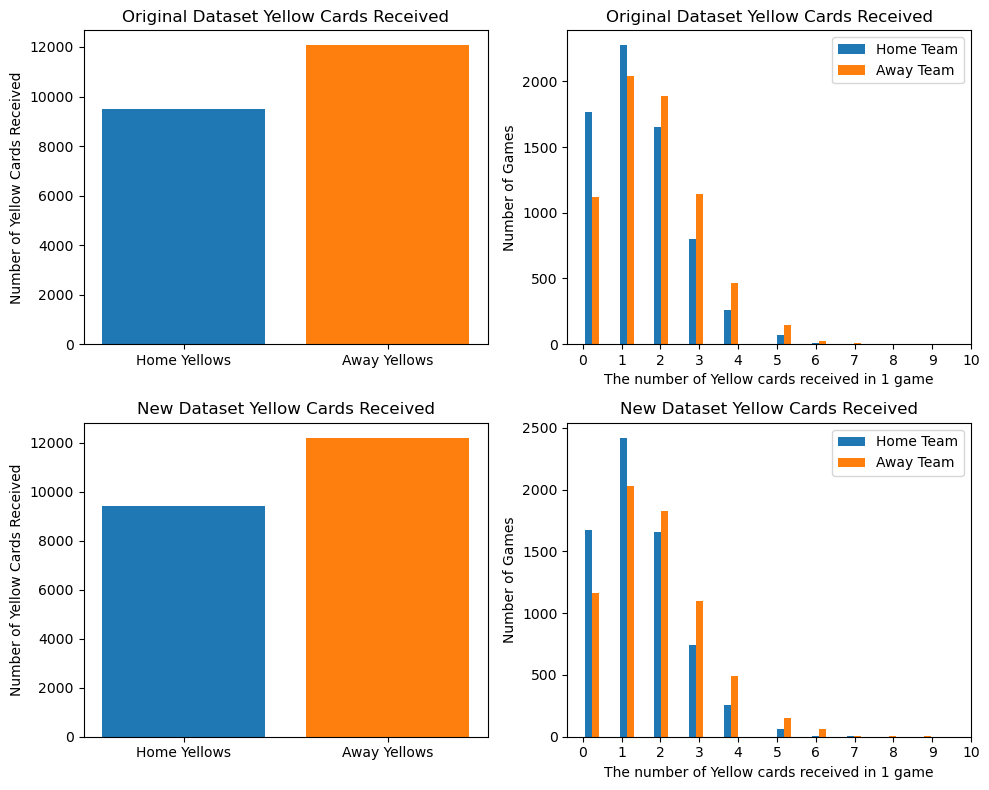

In [62]:
# Create a bar chart showing the number of goals scored home and away for both datasets

fig, axis = plt.subplots(2, 2, figsize=(10, 8))
 

# Original Dataset Barchart for Yellow cards received
axis[0, 0].bar('Home Team', total_home_yellow, label = 'Home Yellows')
axis[0, 0].bar('Away Team', total_away_yellow, label = 'Away Yellows')
axis[0, 0].set_ylabel("Number of Yellow Cards Received")
axis[0, 0].set_title("Original Dataset Yellow Cards Received") 


# Original Dataset Histogram for Yellow cards received
axis[0, 1].hist([home_y, away_y], 20, label = ['Home Team', 'Away Team'])
axis[0, 1].set_xticks(range(0, 11))
axis[0, 1].set_ylabel("Number of Games")
axis[0, 1].set_xlabel("The number of yellow cards received in 1 game")
axis[0, 1].set_title("Original Dataset Yellow Cards Received")
axis[0, 1].legend()


# New Dataset Barchart for Yellow cards received
axis[1, 0].bar('Home Team', new_total_HY, label = 'Home Yellows')
axis[1, 0].bar('Away Team', new_total_AY, label = 'Away Yellows')
axis[1, 0].set_ylabel("Number of Yellow Cards Received")
axis[1, 0].set_title("New Dataset Yellow Cards Received")


# New Dataset Histogram for Yellow cards received
axis[1, 1].hist([hist_NHY, hist_NAY], 20, label = ['Home Team', 'Away Team'])
axis[1, 1].set_xticks(range(0, 11))
axis[1, 1].set_ylabel("Number of Games")
axis[1, 1].set_xlabel("The number of yellow cards received in 1 game")
axis[1, 1].set_title("New Dataset Yellow Cards Received")
axis[1, 1].legend()


plt.tight_layout()
plt.show

References

"We now take a look at the mean and variance (the square of the standard deviation) of Man Utd’s scoring rate. We are hoping to see these two values to be equal, since we know that the mean and variance of a Poisson random variable are the same."

https://bookdown.org/theqdata/honors_thesis/introduction.html
https://data-dive.com/jupyterlab-markdown-cells-include-variables/
https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/
https://www.datacamp.com/tutorial/joining-dataframes-pandas
https://pythonhow.com/how/limit-floats-to-two-decimal-points/#:~:text=To%20limit%20a%20float%20to,resulting%20in%20the%20value%203.14.

In [ ]:
from datetime import datetime, timedelta
import random
import pandas as pd

# Define the start and end years for the seasons
start_year = 2001
end_year = 2018

# Create an empty list to store all fixture dates
all_fixtures = []

# Loop through each season
for year in range(start_year, end_year + 1):
    # Define the start and end dates for each season
    start_date = datetime(year, 8, 1)  # August 1st of the year
    end_date = datetime(year + 1, 5, 31)  # May 31st of the following year

    current_date = start_date
    while current_date <= end_date:
        if current_date.weekday() in [5, 6]:  # Saturday (5) or Sunday (6)
            for _ in range(10):
                all_fixtures.append(current_date)
        
        current_date += timedelta(days=1)


# Create a DataFrame with all fixture dates
df_fixtures = pd.DataFrame({'Fixture_Date': all_fixtures})

# Display the first few rows of the DataFrame
print(df_fixtures.head())

## **END**